# **MILESTONE 1:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
import seaborn as sns
import matplotlib.dates as mdates
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GlobalWeatherRepository.csv")

# **Inspection of data**

In [ ]:
df_cpy = df.copy()
print("Shape of dataset: ",df_cpy.shape)
print("First 5 rows: ",df_cpy.head())

Shape of dataset:  (88273, 41)
First 5 rows:         country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  16-05-2024 13:15                 26.6   
1          1715849100  16-05-2024 10:45                 19.0   
2          1715849100  16-05-2024 09:45                 23.0   
3          1715849100  16-05-2024 10:45                  6.3   
4          1715849100  16-05-2024 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8

# INFORMATION

In [ ]:
print(df_cpy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88273 entries, 0 to 88272
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       88273 non-null  object 
 1   location_name                 88273 non-null  object 
 2   latitude                      88273 non-null  float64
 3   longitude                     88273 non-null  float64
 4   timezone                      88273 non-null  object 
 5   last_updated_epoch            88273 non-null  int64  
 6   last_updated                  88273 non-null  object 
 7   temperature_celsius           88273 non-null  float64
 8   temperature_fahrenheit        88273 non-null  float64
 9   condition_text                88273 non-null  object 
 10  wind_mph                      88273 non-null  float64
 11  wind_kph                      88273 non-null  float64
 12  wind_degree                   88273 non-null  int64  
 13  w

## SUMMARY OF THE DATASET


In [ ]:
print(df_cpy.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  88273.000000  88273.000000        8.827300e+04         88273.000000   
mean      19.125848     22.172647        1.735507e+09            22.681788   
std       24.470798     65.836668        1.135389e+07             9.091355   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.725710e+09            18.000000   
50%       17.250000     23.316700        1.735555e+09            25.000000   
75%       40.400000     50.580000        1.745313e+09            28.400000   
max       64.150000    179.220000        1.755074e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            88273.000000  88273.000000  88273.000000  88273.000000   
mean                72.828923      8.292613     13.348916    170.584743   
std                 16.364215      8.137603     13.093950    103.107058 

# CHECKING NULL VALUES

In [ ]:
print("Missing values per column:")
print(df_cpy.isnull().sum())
print("Data coverage (non-null counts):")
print(df_cpy.count())

Missing values per column:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone    

# CHECKING MISSING %AGE IN EACH COLUMN

In [ ]:
missing_prcntge = (df_cpy.isnull().sum() / len(df) * 100)
print("Missing percentage per column:")
print(missing_prcntge)

Missing percentage per column:
country                         0.0
location_name                   0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0

# **AGGREGATE THE DATE COLUMN **

In [ ]:
if 'last_updated' in df_cpy.columns:
    df_cpy['last_updated'] = pd.to_datetime(df_cpy['last_updated'])
    df_cpy.set_index('last_updated', inplace=True)
    monthly_avg = df_cpy.resample('M').mean(numeric_only=True)
    print("Monthly averages:")
    print(monthly_avg.head())


/tmp/ipython-input-1246405282.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cpy['last_updated'] = pd.to_datetime(df_cpy['last_updated'])
/tmp/ipython-input-1246405282.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_cpy.resample('M').mean(numeric_only=True)


Monthly averages:
               latitude  longitude  last_updated_epoch  temperature_celsius  \
last_updated                                                                  
2024-05-31    19.330079  21.252653        1.716476e+09            25.153214   
2024-06-30    19.169585  21.786945        1.718494e+09            26.456036   
2024-07-31    19.090607  22.195843        1.721096e+09            26.800448   
2024-08-31    19.107315  22.088584        1.723808e+09            26.789677   
2024-09-30    19.064397  22.147510        1.726441e+09            25.124402   

              temperature_fahrenheit  wind_mph   wind_kph  wind_degree  \
last_updated                                                             
2024-05-31                 77.275500  8.897635  14.322680   170.234384   
2024-06-30                 79.622507  9.127415  14.694197   178.421044   
2024-07-31                 80.242645  8.684089  13.979538   183.502419   
2024-08-31                 80.223093  8.643540  13.915649 

# **MONTHLY AVR. TEMP. TREND**

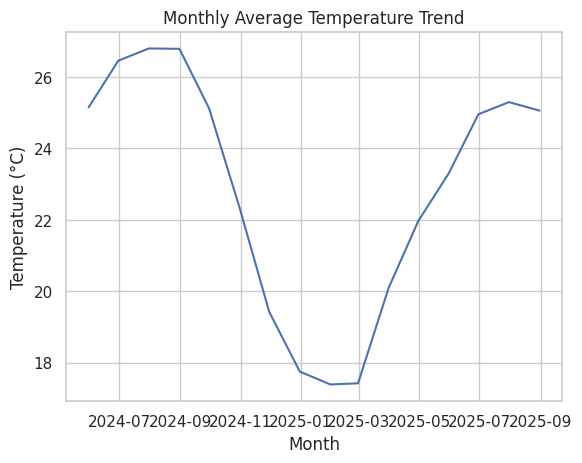

In [ ]:
    plt.plot(monthly_avg.index,monthly_avg['temperature_celsius'])
    plt.title("Monthly Average Temperature Trend")
    plt.xlabel("Month")
    plt.ylabel("Temperature (°C)")
    plt.show()

## REMOVING DUPLICATE COLUMNS

In [ ]:
df_cpy = df.copy()
df_cpy.drop(columns=[
    "temperature_fahrenheit","gust_mph","feels_like_fahrenheit",
    "wind_mph", "pressure_in", "precip_in",
    "visibility_miles"
], inplace=True)

df_cpy.set_index('last_updated', inplace=True)
print(df_cpy.head())

                      country     location_name  latitude  longitude  \
last_updated                                                           
16-05-2024 13:15  Afghanistan             Kabul     34.52      69.18   
16-05-2024 10:45      Albania            Tirana     41.33      19.82   
16-05-2024 09:45      Algeria           Algiers     36.76       3.05   
16-05-2024 10:45      Andorra  Andorra La Vella     42.50       1.52   
16-05-2024 09:45       Angola            Luanda     -8.84      13.23   

                        timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                
16-05-2024 13:15      Asia/Kabul          1715849100                 26.6   
16-05-2024 10:45   Europe/Tirane          1715849100                 19.0   
16-05-2024 09:45  Africa/Algiers          1715849100                 23.0   
16-05-2024 10:45  Europe/Andorra          1715849100                  6.3   
16-05-2024 09:45   Africa/Luanda 

In [ ]:
print(df_cpy.shape)
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica"
        }
        return continent_name[continent_code]
    except:
        return "Unknown"

df_cpy["region"] = df_cpy["country"].apply(country_to_continent)

print(df_cpy[["country", "region"]].head(20))

(88273, 33)
                              country         region
last_updated                                        
16-05-2024 13:15          Afghanistan           Asia
16-05-2024 10:45              Albania         Europe
16-05-2024 09:45              Algeria         Africa
16-05-2024 10:45              Andorra         Europe
16-05-2024 09:45               Angola         Africa
16-05-2024 04:45  Antigua and Barbuda  North America
16-05-2024 05:45            Argentina  South America
16-05-2024 12:45              Armenia           Asia
16-05-2024 18:45            Australia        Oceania
16-05-2024 10:45              Austria         Europe
16-05-2024 12:45           Azerbaijan           Asia
16-05-2024 04:45              Bahamas  North America
16-05-2024 11:45              Bahrain           Asia
16-05-2024 14:45           Bangladesh           Asia
16-05-2024 04:45             Barbados  North America
16-05-2024 11:45              Belarus         Europe
16-05-2024 10:45              Belg

In [ ]:
print(df_cpy.head())

                      country     location_name  latitude  longitude  \
last_updated                                                           
16-05-2024 13:15  Afghanistan             Kabul     34.52      69.18   
16-05-2024 10:45      Albania            Tirana     41.33      19.82   
16-05-2024 09:45      Algeria           Algiers     36.76       3.05   
16-05-2024 10:45      Andorra  Andorra La Vella     42.50       1.52   
16-05-2024 09:45       Angola            Luanda     -8.84      13.23   

                        timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                
16-05-2024 13:15      Asia/Kabul          1715849100                 26.6   
16-05-2024 10:45   Europe/Tirane          1715849100                 19.0   
16-05-2024 09:45  Africa/Algiers          1715849100                 23.0   
16-05-2024 10:45  Europe/Andorra          1715849100                  6.3   
16-05-2024 09:45   Africa/Luanda 

In [ ]:
df_cpy.to_csv("climate_with_regions.csv")


# MILESTONE 2

Analyze weather data to understand distributions, correlations, seasonal patterns, and trends, identify extreme weather events, compare weather conditions across regions, and select suitable visualization types.

## Statistical analysis

### Subtask:
Calculate descriptive statistics for key weather variables to understand their distributions and central tendencies.


**Reasoning**:
Select the relevant numerical columns and calculate descriptive statistics.



In [ ]:
# Select relevant numerical columns
numerical_cols = [
    'temperature_celsius', 'wind_kph', 'pressure_mb', 'humidity', 'cloud',
    'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
    'air_quality_gb-defra-index', 'moon_illumination'
]

# Check data types of selected columns
print("Data types of selected columns:")
print(df_cpy[numerical_cols].info())


Data types of selected columns:
<class 'pandas.core.frame.DataFrame'>
Index: 88273 entries, 16-05-2024 13:15 to 13-08-2025 10:15
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature_celsius           88273 non-null  float64
 1   wind_kph                      88273 non-null  float64
 2   pressure_mb                   88273 non-null  int64  
 3   humidity                      88273 non-null  int64  
 4   cloud                         88273 non-null  int64  
 5   feels_like_celsius            88273 non-null  float64
 6   visibility_km                 88273 non-null  float64
 7   uv_index                      88273 non-null  float64
 8   gust_kph                      88273 non-null  float64
 9   air_quality_Carbon_Monoxide   88273 non-null  float64
 10  air_quality_Ozone             88273 non-null  float64
 11  air_quality_Nitrogen_dioxide  88273 non-null  float64
 12  air_qua

## Correlation analysis

### Subtask:
Analyze correlations between different weather variables to identify relationships.


**Reasoning**:
Calculate the pairwise correlation of the numerical columns in the `df_cpy` DataFrame and store it in `correlation_matrix`.



In [ ]:
correlation_matrix = df_cpy.corr(numeric_only=True)
print(correlation_matrix)

                              latitude  longitude  last_updated_epoch  \
latitude                      1.000000  -0.020193           -0.000716   
longitude                    -0.020193   1.000000            0.000890   
last_updated_epoch           -0.000716   0.000890            1.000000   
temperature_celsius          -0.282533   0.143846           -0.092312   
wind_kph                      0.024140   0.038331           -0.015896   
wind_degree                   0.170555   0.070923           -0.008472   
pressure_mb                   0.011258  -0.112311            0.042479   
precip_mm                    -0.054830   0.059699           -0.012145   
humidity                     -0.145312  -0.213335            0.057457   
cloud                        -0.080388   0.028645           -0.007732   
feels_like_celsius           -0.318451   0.144446           -0.093059   
visibility_km                -0.004511   0.130501           -0.011882   
uv_index                     -0.079654   0.071812  

## Identify extreme weather events

### Subtask:
Define criteria for extreme weather events and identify them in the dataset.


**Reasoning**:
Define the thresholds for extreme temperature and precipitation and create new columns to flag extreme events in the dataframe.



In [ ]:
# Define thresholds( temp. above the 95th percentile)
extreme_temp_threshold = df_cpy['temperature_celsius'].quantile(0.95)

# Define thresholds (prep. above the 95th percentile)
extreme_precip_threshold = df_cpy['precip_mm'].quantile(0.95)
df_cpy['is_extreme_temperature'] = df_cpy['temperature_celsius'] > extreme_temp_threshold
df_cpy['is_extreme_precipitation'] = df_cpy['precip_mm'] > extreme_precip_threshold
df_cpy['is_extreme_weather'] = df_cpy['is_extreme_temperature'] | df_cpy['is_extreme_precipitation']
print("Extreme temperature threshold:", extreme_temp_threshold)
print("Extreme precipitation threshold:", extreme_precip_threshold)
print("\nDataFrame with extreme weather flags:")
print(df_cpy[['temperature_celsius', 'precip_mm', 'is_extreme_temperature', 'is_extreme_precipitation', 'is_extreme_weather']].head())

Extreme temperature threshold: 35.0
Extreme precipitation threshold: 0.82

DataFrame with extreme weather flags:
                  temperature_celsius  precip_mm  is_extreme_temperature  \
last_updated                                                               
16-05-2024 13:15                 26.6        0.0                   False   
16-05-2024 10:45                 19.0        0.1                   False   
16-05-2024 09:45                 23.0        0.0                   False   
16-05-2024 10:45                  6.3        0.3                   False   
16-05-2024 09:45                 26.0        0.0                   False   

                  is_extreme_precipitation  is_extreme_weather  
last_updated                                                    
16-05-2024 13:15                     False               False  
16-05-2024 10:45                     False               False  
16-05-2024 09:45                     False               False  
16-05-2024 10:45             

## Compare weather conditions across regions

### Subtask:
Group the data by region and compare key weather metrics.


**Reasoning**:
Group the data by region and calculate the mean of relevant weather metrics.



In [ ]:
regional_weather = df_cpy.groupby('region')[['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']].mean()
print("Regional Average Weather Metrics:")
print(regional_weather)

Regional Average Weather Metrics:
               temperature_celsius   humidity   wind_kph  precip_mm
region                                                             
Africa                   26.355270  56.839615  13.918074   0.124944
Asia                     25.549154  50.995531  13.315689   0.161041
Europe                   15.965123  63.959996  13.386687   0.100895
North America            22.676730  84.494395  13.228894   0.130887
Oceania                  24.294850  83.472503  17.899080   0.276215
South America            18.102181  81.172242   7.668342   0.128514
Unknown                  24.544380  69.160584  11.371423   0.189661


## Generate visualizations

### Subtask:
Create visualizations to illustrate the findings from the analysis.


**Reasoning**:
Create the requested visualizations to illustrate the findings from the analysis.



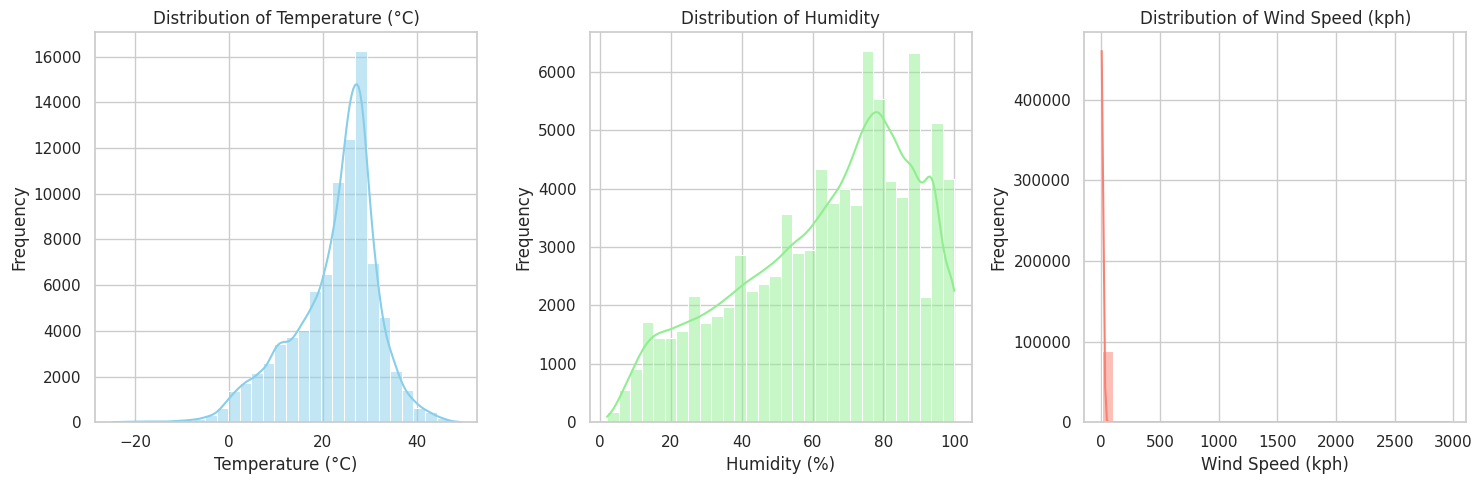

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Temperature distribution
sns.histplot(df_cpy['temperature_celsius'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Temperature (°C)")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("Frequency")

# Humidity distribution
sns.histplot(df_cpy['humidity'], bins=30, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribution of Humidity")
axes[1].set_xlabel("Humidity (%)")
axes[1].set_ylabel("Frequency")

# Wind speed distribution
sns.histplot(df_cpy['wind_kph'], bins=30, kde=True, ax=axes[2], color="salmon")
axes[2].set_title("Distribution of Wind Speed (kph)")
axes[2].set_xlabel("Wind Speed (kph)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


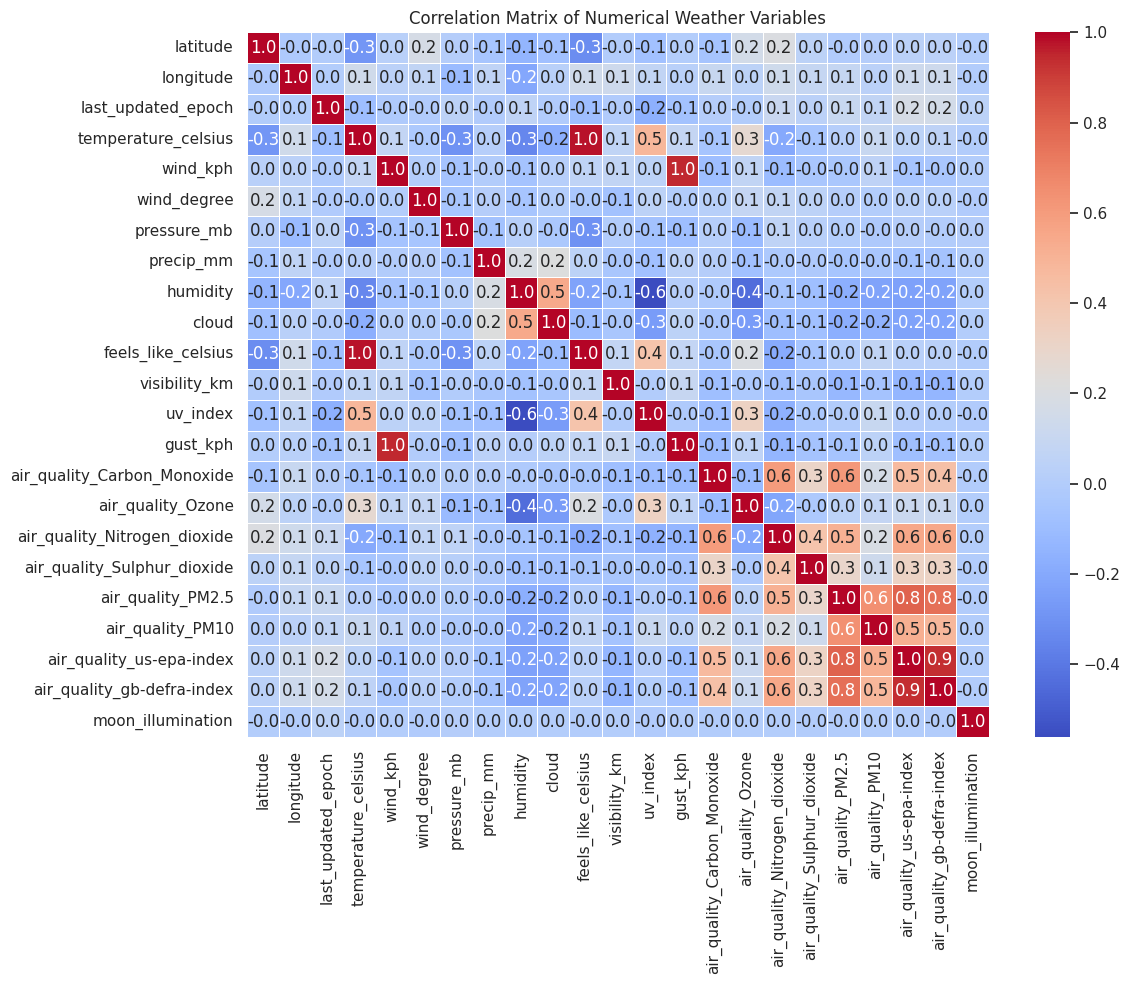

In [ ]:
# 2. Heatmap of the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Weather Variables')
plt.tight_layout()
plt.show()

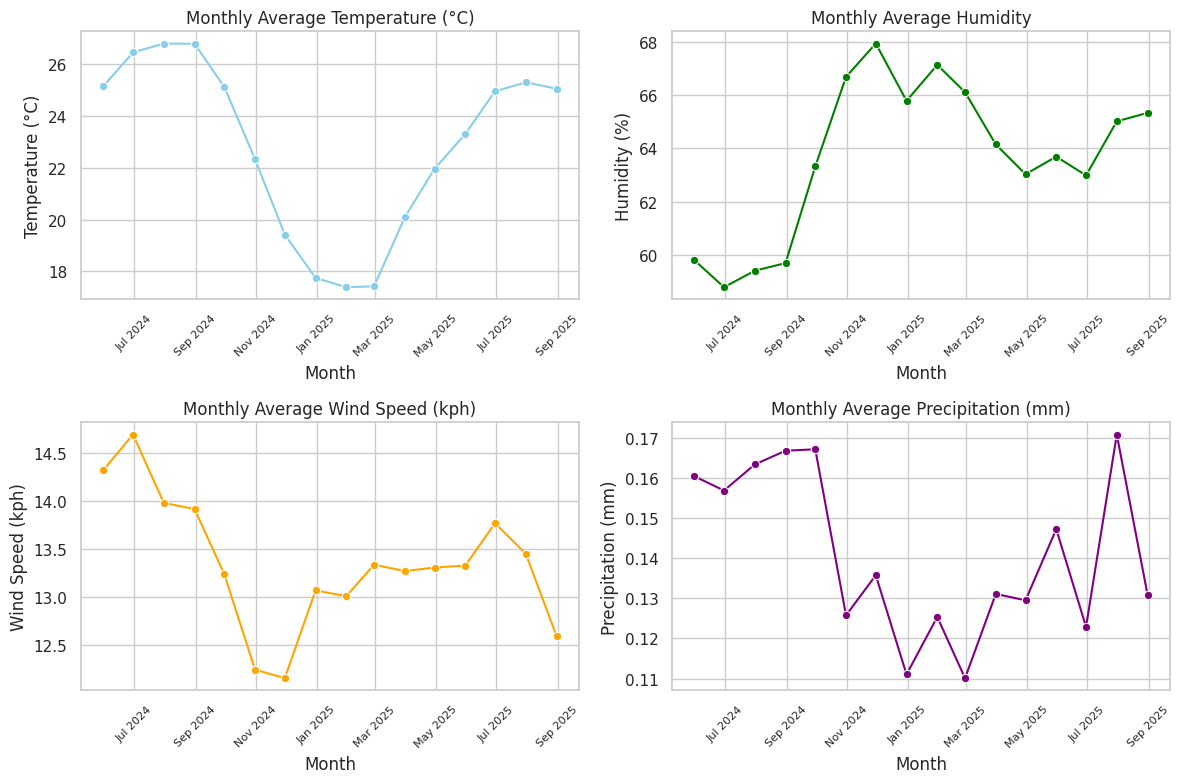

In [ ]:
# 3. Line graphs for monthly averages (seasonal patterns)
seasonal_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']
monthly_seasonal = monthly_avg[seasonal_cols]
plt.figure(figsize=(12, 8))
# 1. Temperature
ax1 = plt.subplot(2, 2, 1)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['temperature_celsius'], marker="o", color="skyblue", ax=ax1)
ax1.set_title("Monthly Average Temperature (°C)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.tick_params(axis='x', rotation=45, labelsize=8)
# 2. Humidity
ax2 = plt.subplot(2, 2, 2)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['humidity'], marker="o", color="green", ax=ax2)
ax2.set_title("Monthly Average Humidity")
ax2.set_xlabel("Month")
ax2.set_ylabel("Humidity (%)")
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# 3. Wind Speed
ax3 = plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['wind_kph'], marker="o", color="orange", ax=ax3)
ax3.set_title("Monthly Average Wind Speed (kph)")
ax3.set_xlabel("Month")
ax3.set_ylabel("Wind Speed (kph)")
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax3.tick_params(axis='x', rotation=45, labelsize=8)

# 4. Precipitation
ax4 = plt.subplot(2, 2, 4)
sns.lineplot(x=monthly_seasonal.index, y=monthly_seasonal['precip_mm'], marker="o", color="purple", ax=ax4)
ax4.set_title("Monthly Average Precipitation (mm)")
ax4.set_xlabel("Month")
ax4.set_ylabel("Precipitation (mm)")
ax4.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax4.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

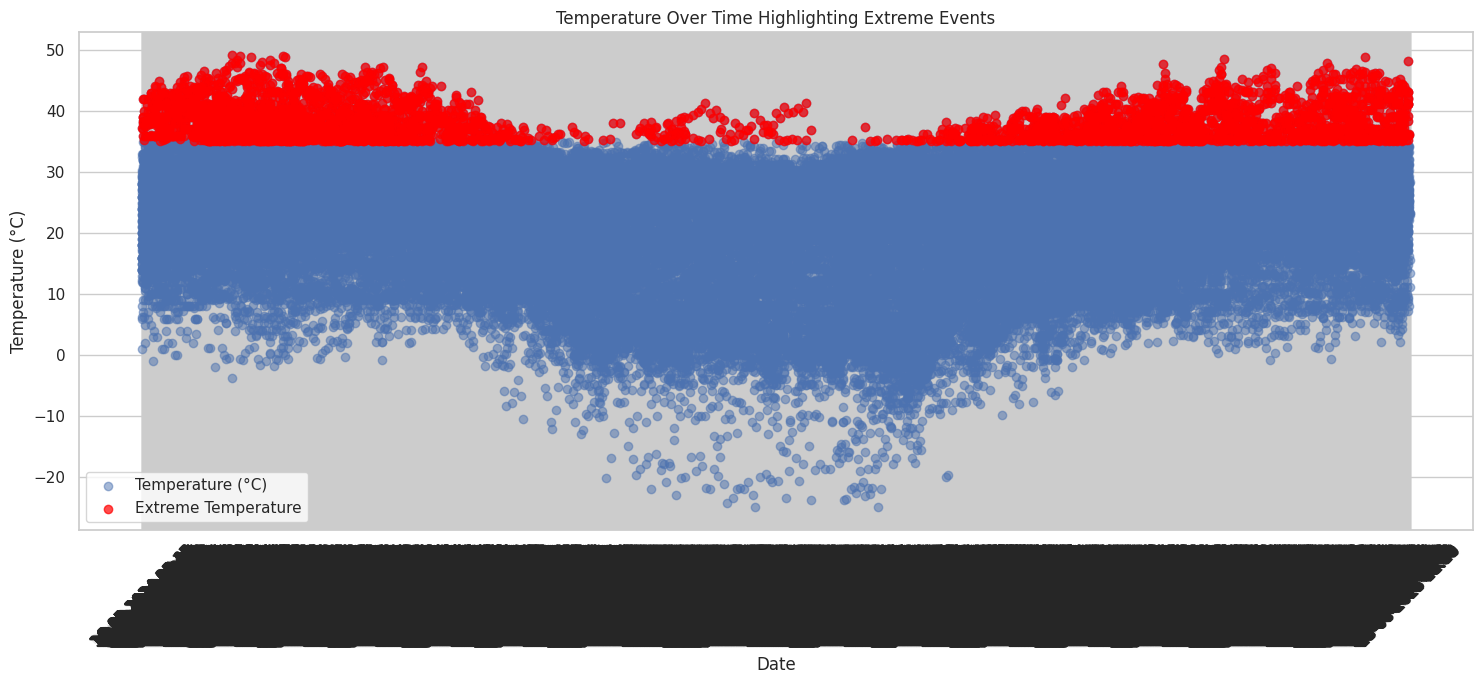

In [ ]:
# 4. Scatter plot of temperature over time, highlighting extreme temperature events
plt.figure(figsize=(15, 7))
plt.scatter(df_cpy.index, df_cpy['temperature_celsius'], alpha=0.5, label='Temperature (°C)')
plt.scatter(df_cpy.index[df_cpy['is_extreme_temperature']], df_cpy['temperature_celsius'][df_cpy['is_extreme_temperature']], color='red', label='Extreme Temperature', alpha=0.7)
plt.title('Temperature Over Time Highlighting Extreme Events')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1742530117.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


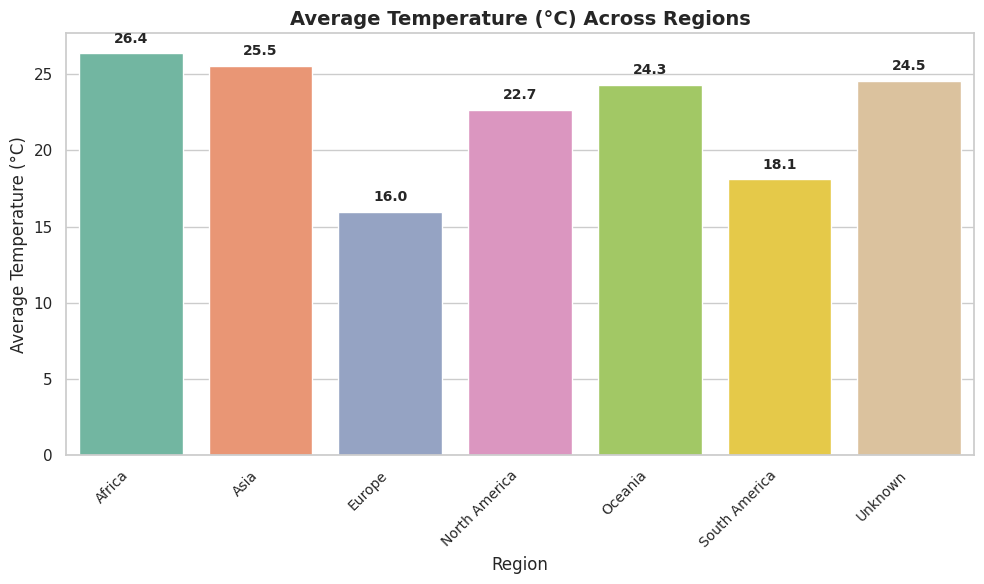

In [ ]:
# 5. Bar plot comparing average temperature across regions
plt.figure(figsize=(10, 6))
# regional_weather['temperature_celsius'].plot(kind='bar')
# plt.title('Average Temperature (°C) Across Regions')
# plt.xlabel('Region')
# plt.ylabel('Average Temperature (°C)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()
sns.barplot(
    x=regional_weather.index,
    y=regional_weather['temperature_celsius'],
    palette="Set2"
)

for i, val in enumerate(regional_weather['temperature_celsius']):
    plt.text(i, val + 0.5, f"{val:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Temperature (°C) Across Regions", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Temperature (°C)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()